In [13]:
import pandas as pd
import numpy as np
import sweetviz as sv
import os
import matplotlib.pyplot as plt

from count_view_Reaction import *
from step1_to_4 import *

In [14]:
# Change working directory
os.chdir('/Users/suongsuong/Documents/GitHub/Reactivity-based-metric-of-complexity/Reduction of ketone/')

# <span style="color:blue"> Search data on Reaxys </span>
- Draw as shown
<img src="Reaxys_Raw data/draw/ketone_in_ring_search.png" width="400" height="180">
- Choose ‘as substructure’ then ‘On all atoms’
- Start with **142,563 reactions**
- Limit to ‘sodium tetrahydroborate’, single-step, article → **22,722 reactions**
- Exclude NA yield → **11,432 reactions**


# <span style="color:blue"> Import data </span>

- Double check number of reactions

In [15]:
ketone_in_ring = pd.read_excel('Reaxys_Raw data/ketone_in_ring.xlsx')
count_num_reaction(ketone_in_ring)
count_num_row(ketone_in_ring)

Number of Reactions: 11432
Number of Rows: 21137


Because of the searching query, this data includes the reduction of cyclo-5,6-ketone.
Concat both data, then process (including remove duplicates rows)

In [16]:
cyclo_56_ketone = pd.read_excel('Reaxys_Raw data/cyclo5,6.xlsx')
count_num_reaction(cyclo_56_ketone)
count_num_row(cyclo_56_ketone)

Number of Reactions: 5421
Number of Rows: 11834


In [17]:
# Only takes these information:
columns_to_keep = [ 
    'Reaction', 
    'Reactant', 
    'Product', 
    'Reagent', 
    'Catalyst', 
    'Solvent (Reaction Details)',
    
    'Time (Reaction Details) [h]',
    'Temperature (Reaction Details) [C]',
    
    'Yield',
    
    'Reaction ID', 
    'Links to Reaxys',
    'Reaction: Links to Reaxys',
    'References'
]

ketone_in_ring = ketone_in_ring[columns_to_keep]
cyclo_56_ketone = cyclo_56_ketone[columns_to_keep]


In [18]:
merged = pd.merge(ketone_in_ring,cyclo_56_ketone, indicator=True, how='outer')

# Get the on only in ketone_ring 
only_ketone_ring = merged[merged['_merge'] == 'left_only'].drop('_merge', axis = 1)
print('Rows only in ketone_in_ring:')
count_num_reaction(only_ketone_ring)
count_num_row(only_ketone_ring)

# then append origianl cyclo_56_ketone
full_cyclo_ketone = pd.concat([only_ketone_ring, cyclo_56_ketone], ignore_index=True)
print('Rows after appending:')
count_num_reaction(full_cyclo_ketone)
count_num_row(full_cyclo_ketone)

Rows only in ketone_in_ring:
Number of Reactions: 6205
Number of Rows: 10100
Rows after appending:
Number of Reactions: 11617
Number of Rows: 21934


###  <span style="color:blue"> Step 1: General Cleaning</span>
### <span style="color:blue"> Step 2: Verify reaction by MW</span>
### <span style="color:blue"> Step 3: Verify reaction by change in C-O bonds</span>
### <span style="color:blue"> Step 4: Ensure consistent reaction conditions</span>

In [19]:
full_ketone_ring_clean_1_to_4 = step_1_to_4(full_cyclo_ketone)

STEP 1 - general cleaning:
Number of Reactions: 5644
---------------------------------------


[12:55:58] Explicit valence for atom # 9 N, 4, is greater than permitted
[12:55:58] Explicit valence for atom # 9 N, 4, is greater than permitted


STEP 2 - Verify reaction by change in MW:
Number of Reactions: 4886
---------------------------------------
STEP 3 - Verify reaction by change in C-O bond:
Number of Reactions: 4856
---------------------------------------
STEP 4 - Ensure consistent reaction conditions:
 - After filtering by reagent:
Number of Reactions: 3458
 - After filtering by solvent:
Number of Reactions: 1948
 - After filtering by temperature:
Number of Reactions: 776
 - After filtering by time:
Number of Reactions: 771
Number of Rows: 788


### <span style="color:blue"> Step 5: Inspect duplicate rows </span>

In [20]:
full_ketone_ring_clean_1_to_4['Reaction ID'].value_counts().head(20)

26019020    2
31427347    2
26019012    2
10088666    2
50834932    2
4899473     2
2839467     2
8974540     2
5103599     2
5125708     2
2227545     2
35575077    2
2451291     2
1159290     2
40358815    2
32575260    2
5228268     2
38024391    1
34392968    1
37541659    1
Name: Reaction ID, dtype: int64

Reaction ID: 5228268


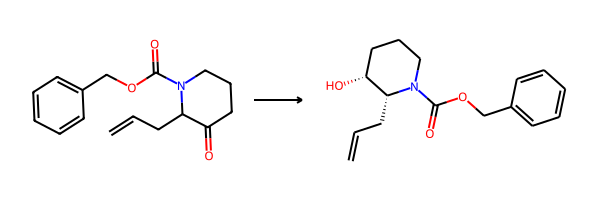

Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                               1.0
Temperature (Reaction Details) [C]                          0
Yield                                              97 percent
Name: 0, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6192081&database=RX&origin=ReaxysOutput&ln=

Reaction ID: 5228268


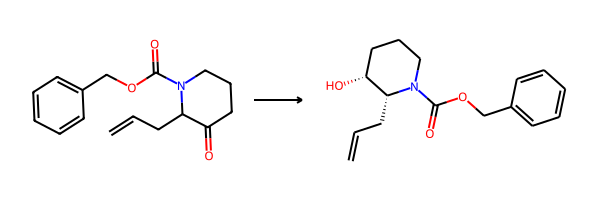

Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                               0.5
Temperature (Reaction Details) [C]                          0
Yield                                              97 percent
Name: 1, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6216323&database=RX&origin=ReaxysOutput&ln=



,Reaction,Reactant,Product,Reagent,Catalyst,Solvent (Reaction Details),Time (Reaction Details) [h],Temperature (Reaction Details) [C],Yield,Reaction ID,Links to Reaxys,Reaction: Links to Reaxys,References,Yield (number),Reactant SMILES,Product SMILES,Change_MW,Largest Reactant MW,change in C-O single bond,change in C=O double bond
1994,C=CCC1N(CCCC1=O)C(=O)OCC1=CC=CC=C1>>O[C@@H]1CC...,Benzyl 2-allyl-3-oxo-1-piperidinecarboxylate,"(2S*,3S*)-Benzyl 2-allyl-3-hydroxy-1-piperidin...",sodium tetrahydroborate,NaN,methanol,1.0,0,97 percent,5228268,https://www.reaxys.com/reaxys/secured/hopinto....,https://www.reaxys.com/reaxys/secured/hopinto....,"Article; Takeuchi, Yasuo; Hattori, Mayumi; Abe...",97.0,[C=CCC1N(CCCC1=O)C(=O)OCC1=CC=CC=C1],[O[C@@H]1CCCN([C@@H]1CC=C)C(=O)OCC1=CC=CC=C1],2.016,273.332,1,-1
1995,C=CCC1N(CCCC1=O)C(=O)OCC1=CC=CC=C1>>O[C@@H]1CC...,Benzyl 2-allyl-3-oxo-1-piperidinecarboxylate,"(2S*,3S*)-Benzyl 2-allyl-3-hydroxy-1-piperidin...",sodium tetrahydroborate,NaN,methanol,0.5,0,97 percent,5228268,https://www.reaxys.com/reaxys/secured/hopinto....,https://www.reaxys.com/reaxys/secured/hopinto....,"Article; Takeuchi, Yasuo; Abe, Hitoshi; Haraya...",97.0,[C=CCC1N(CCCC1=O)C(=O)OCC1=CC=CC=C1],[O[C@@H]1CCCN([C@@H]1CC=C)C(=O)OCC1=CC=CC=C1],2.016,273.332,1,-1


In [21]:
#### USE THIS CODE TO EXAMINE THE REACTION

Reaction_ID = 5228268
view_reactionScheme(full_ketone_ring_clean_1_to_4[full_ketone_ring_clean_1_to_4['Reaction ID'] == Reaction_ID], 2, 'keep duplicate')
full_ketone_ring_clean_1_to_4[full_ketone_ring_clean_1_to_4['Reaction ID'] == Reaction_ID]

<span style="color:salmon"> Reaction ID = 5228268 </span> 

different time, the right time is 0.5
=> Keep the one having time of 0.5 h

<span style="color:salmon"> Reaction ID = 2227545 </span> 

Same reaction, different reacting time with 2 different yields 

1h reaction ~ 90 % 

1.5h reaction ~ 82% 

=> take average of time and yields

<span style="color:salmon"> Reaction ID = 8974540 </span>

2 references with 2 different time and yield.
Check reference, the one yielding 70% is overall yield including other reaction

=> Keep the one having 97% yield

<span style="color:salmon"> Reaction ID = 31427347 </span>

2 references with 2 different time and yield.
Check reference, the one yielding 99% having no reaction, or procedure reported

=> Keep the one having 100% yield

<span style="color:salmon"> Reaction ID = 5125708 </span>

Same reaction, conditions, 2 reported yields (96% vs 96.3%) from 2 references with same title, same authors but published in 2 different years in 2 different journals. 

=> Both were actually 96%. Keep the one having 96% yield

<span style="color:salmon"> Reaction ID = 10088666</span> 

Not purifying in both paper

=> Remove both

<span style="color:salmon"> Reaction ID =  4899473, 40358815, 26019020, 26019012, 35575077, 2451291,  2839467 </span> 

Same reaction, conditions, yield, but different journals

=> keep 1, no matter which


<span style="color:salmon"> Reaction ID = 50834932 </span> 

Same reaction, different reacting time with 2 different yields 

the one yielding 94% have no procedure reported 

=> Keep the one having 96% yield

<span style="color:salmon"> Reaction ID = 5103599 </span> 

Same reaction, different reacting time with 2 different yields 

12h reaction ~ 83%  => no procedure reported

0.5h reaction ~ 96.7% 

=> keep one yielding 83%

<span style="color:salmon"> Reaction ID = 1159290 </span> 

Same reaction, conditions, 2 references reported 2 different yields

=> Too different. Remove both

<span style="color:salmon"> Reaction ID = 32575260 </span> 

Same yield reported (2 references) for same reaction of same reaction conditions.

Check the literatures: the yields are actually 74% and 23% (not 73 and 24) for both. 
Note for later if needed because this difference does not affect the sum for now

Note: both have no procedure reported

=> keep 1, no matter which

#### Based on comments above, handle duplicated rows and update yields. Note for later when verifying reactions with literatures.

In [22]:
id_toremove = [10088666, 1159290]
id_tokeep1_nomatter = [4899473, 40358815, 26019020, 26019012, 35575077, 2451291, 2839467, 32575260]
id_tokeep1_average = [2227545]
id_tokeep1_condition = [5228268, 8974540, 31427347, 5125708, 50834932, 5103599]

# Keep 1 no matter what condition
cyclo_remove_duplicate = pd.concat([
    full_ketone_ring_clean_1_to_4[full_ketone_ring_clean_1_to_4['Reaction ID'].isin(id_tokeep1_nomatter)].drop_duplicates(subset=['Reaction ID']),
    full_ketone_ring_clean_1_to_4[~full_ketone_ring_clean_1_to_4['Reaction ID'].isin(id_tokeep1_nomatter)]
])

count_num_reaction(cyclo_remove_duplicate)
count_num_row(cyclo_remove_duplicate)
# Update the 'Yield' and 'Time' column for 'Reaction ID' 2227545
cyclo_remove_duplicate = pd.concat([
    cyclo_remove_duplicate[cyclo_remove_duplicate['Reaction ID'].isin(id_tokeep1_average)].drop_duplicates(subset=['Reaction ID']),
    cyclo_remove_duplicate[~cyclo_remove_duplicate['Reaction ID'].isin(id_tokeep1_average)]
])
cyclo_remove_duplicate.loc[cyclo_remove_duplicate['Reaction ID'] == 2227545, 'Yield (number)'] = np.average([90, 82])
cyclo_remove_duplicate.loc[cyclo_remove_duplicate['Reaction ID'] == 2227545, 'Yield'] = str(np.average([90, 82]))
cyclo_remove_duplicate.loc[cyclo_remove_duplicate['Reaction ID'] == 2227545, 'Time (Reaction Details) [h]'] = np.average([1, 1.5])

# Remove rows with 'Reaction ID' in id_toremove
cyclo_remove_duplicate = cyclo_remove_duplicate[~cyclo_remove_duplicate['Reaction ID'].isin(id_toremove)]

count_num_reaction(cyclo_remove_duplicate)
count_num_row(cyclo_remove_duplicate)
# Keep 1 with condition
conditions = [
    (5228268, 'Time (Reaction Details) [h]', 0.5),
    (8974540, 'Yield (number)', 97),
    (31427347, 'Yield (number)', 100),
    (5125708, 'Yield (number)', 96),
    (50834932, 'Yield (number)', 96),
    (5103599, 'Yield (number)', 83)
]

not_conditions = cyclo_remove_duplicate[~cyclo_remove_duplicate['Reaction ID'].isin(id_tokeep1_condition)]
condition_rows = [cyclo_remove_duplicate[(cyclo_remove_duplicate['Reaction ID'] == id) & (cyclo_remove_duplicate[col] == val)] for id, col, val in conditions]

for id, col, val in conditions:
    if col == 'Yield (number)':
        cyclo_remove_duplicate.loc[cyclo_remove_duplicate['Reaction ID'] == id, 'Yield'] = (str(val) + 'percent')

cyclo_remove_duplicate = pd.concat([not_conditions] + condition_rows)

count_num_reaction(cyclo_remove_duplicate)
count_num_row(cyclo_remove_duplicate)


Number of Reactions: 771
Number of Rows: 780
Number of Reactions: 769
Number of Rows: 775
Number of Reactions: 769
Number of Rows: 769


#### <span style="color:salmon"> Verify duplicated rows by reaction SMILES </span> 

There are 2 reaction are the same but were assigned to different ID: 48228963 and 48228690
Everything else are the same -> keep 1

In [23]:
cyclo_remove_duplicate['Reaction'].value_counts().head(3)

[H][C@]12CC[C@]3([H])[C@](CC1=C)(C2=O)C(=O)O[C@@]1([H])C[C@@]2([H])O[C@@]4([H])OC[C@@]31[C@@]4([H])C2(C)C>>[H][C@]12OC[C@]34[C@@]1([H])C(C)(C)[C@@]([H])(C[C@]3([H])OC(=O)[C@]13CC(=C)[C@]([H])(CC[C@@]41[H])[C@H]3O)O2    2
COC(=O)C1=CC(=O)[C@@H]2OC3(CCCCC3)O[C@@H]2C1>>COC(=O)C1=C[C@H](O)[C@@H]2OC3(CCCCC3)O[C@@H]2C1                                                                                                                              1
[H][C@@]12C[C@H](O)CC[C@]1(CCC(=O)C2)C(=O)OC>>[H][C@]12C[C@@H](O)CC[C@@]1(CC[C@@H](O)C2)C(=O)OC                                                                                                                            1
Name: Reaction, dtype: int64

In [24]:
cyclo_remove_duplicate = cyclo_remove_duplicate.drop_duplicates( subset = 'Reaction')
count_num_reaction(cyclo_remove_duplicate)
count_num_row(cyclo_remove_duplicate)

Number of Reactions: 768
Number of Rows: 768


### <span style="color:blue"> Step 6: Manually verify reaction by checking literature </span>

----------

## <span style="color:blue"> Histogram of Yield (number) </span>

---------
#### Save data - cyclo5,6ketone